In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 

In [2]:
from config import weather_api_key

In [3]:
# Basic URL for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | saint-joseph
Processing Record 4 of Set 1 | beaupre
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | registro
Processing Record 8 of Set 1 | voznesenye
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | morwell
Processing Record 14 of Set 1 | mason city
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | laguna
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Set 1 | mabaruma
Processing Record 24 of Set 1 | saint-philippe
Processin

Processing Record 37 of Set 4 | ugoofaaru
Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | riyadh
Processing Record 40 of Set 4 | pilar
Processing Record 41 of Set 4 | antalaha
Processing Record 42 of Set 4 | christchurch
Processing Record 43 of Set 4 | aklavik
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | ambilobe
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | qandala
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | ewa beach
Processing Record 3 of Set 5 | bukavu
Processing Record 4 of Set 5 | bom jesus
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | coolum beach
Processing Record 8 of Set 5 | shostka
Processing Record 9 of Set 5 | jaffna
Processing Record 10 of Set 5 | harper
Processing Recor

Processing Record 31 of Set 8 | arys
Processing Record 32 of Set 8 | hurricane
Processing Record 33 of Set 8 | najran
Processing Record 34 of Set 8 | korla
Processing Record 35 of Set 8 | kashi
Processing Record 36 of Set 8 | ouegoa
Processing Record 37 of Set 8 | moron
Processing Record 38 of Set 8 | waipawa
Processing Record 39 of Set 8 | tarko-sale
Processing Record 40 of Set 8 | vierzon
Processing Record 41 of Set 8 | takhtamygda
Processing Record 42 of Set 8 | wukari
Processing Record 43 of Set 8 | manaus
Processing Record 44 of Set 8 | vacaria
Processing Record 45 of Set 8 | thessalon
Processing Record 46 of Set 8 | sechura
Processing Record 47 of Set 8 | vilhena
Processing Record 48 of Set 8 | meyungs
City not found. Skipping...
Processing Record 49 of Set 8 | smidovich
Processing Record 50 of Set 8 | camapua
Processing Record 1 of Set 9 | severo-kurilsk
Processing Record 2 of Set 9 | bedford
Processing Record 3 of Set 9 | jumla
Processing Record 4 of Set 9 | chapais
Processing 

Processing Record 20 of Set 12 | bedele
Processing Record 21 of Set 12 | taburao
City not found. Skipping...
Processing Record 22 of Set 12 | prieska
Processing Record 23 of Set 12 | maldonado
Processing Record 24 of Set 12 | balkanabat
Processing Record 25 of Set 12 | axim
Processing Record 26 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 27 of Set 12 | skibbereen
Processing Record 28 of Set 12 | kostomuksha
Processing Record 29 of Set 12 | vinh
Processing Record 30 of Set 12 | tuatapere
Processing Record 31 of Set 12 | ambanja
Processing Record 32 of Set 12 | kirkenes
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | navahrudak
Processing Record 35 of Set 12 | dawlatabad
Processing Record 36 of Set 12 | turbat
Processing Record 37 of Set 12 | valle de allende
Processing Record 38 of Set 12 | gizo
Processing Record 39 of Set 12 | suhbaatar
Processing Record 40 of Set 12 | udachnyy
Processing Record 41 of Set 12 | moctezuma
Processing Record

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.7000,133.8833,77.00,35,29,4.61,AU,2021-02-07 18:04:50
1,Busselton,-33.6500,115.3333,63.00,99,100,9.13,AU,2021-02-07 18:06:33
2,Saint-Joseph,-21.3667,55.6167,80.60,78,32,4.61,RE,2021-02-07 18:06:33
3,Beaupre,47.0443,-70.8953,24.80,39,95,1.14,CA,2021-02-07 18:06:34
4,Hobart,-42.8794,147.3294,53.60,62,40,5.75,AU,2021-02-07 18:04:19
5,Ushuaia,-54.8000,-68.3000,57.20,54,0,16.11,AR,2021-02-07 18:01:35
6,Registro,-24.4875,-47.8436,84.49,47,50,7.16,BR,2021-02-07 18:06:34
7,Voznesenye,61.0106,35.4781,-2.13,90,55,3.87,RU,2021-02-07 18:06:34
8,Hithadhoo,-0.6000,73.0833,81.97,71,14,8.90,MV,2021-02-07 18:06:34
9,Rikitea,-23.1203,-134.9692,77.38,72,96,12.06,PF,2021-02-07 18:06:34


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alice Springs,AU,2021-02-07 18:04:50,-23.7000,133.8833,77.00,35,29,4.61
1,Busselton,AU,2021-02-07 18:06:33,-33.6500,115.3333,63.00,99,100,9.13
2,Saint-Joseph,RE,2021-02-07 18:06:33,-21.3667,55.6167,80.60,78,32,4.61
3,Beaupre,CA,2021-02-07 18:06:34,47.0443,-70.8953,24.80,39,95,1.14
4,Hobart,AU,2021-02-07 18:04:19,-42.8794,147.3294,53.60,62,40,5.75
5,Ushuaia,AR,2021-02-07 18:01:35,-54.8000,-68.3000,57.20,54,0,16.11
6,Registro,BR,2021-02-07 18:06:34,-24.4875,-47.8436,84.49,47,50,7.16
7,Voznesenye,RU,2021-02-07 18:06:34,61.0106,35.4781,-2.13,90,55,3.87
8,Hithadhoo,MV,2021-02-07 18:06:34,-0.6000,73.0833,81.97,71,14,8.90
9,Rikitea,PF,2021-02-07 18:06:34,-23.1203,-134.9692,77.38,72,96,12.06


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

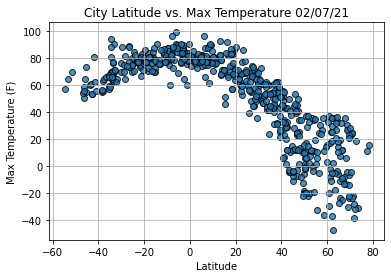

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

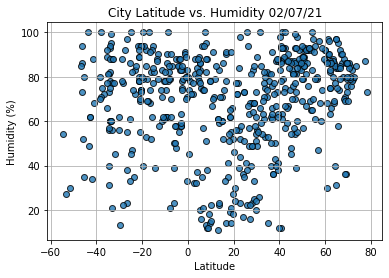

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

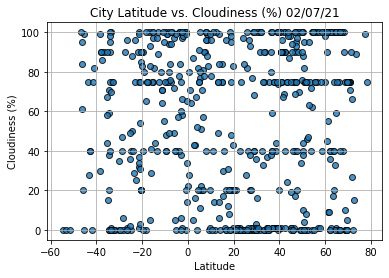

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

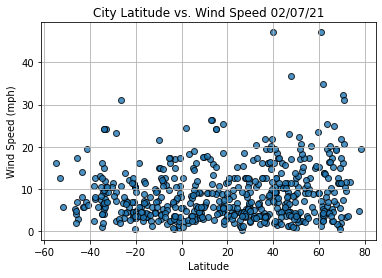

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Mason City
Country                        US
Date          2021-02-07 18:06:35
Lat                       43.1536
Lng                       -93.201
Max Temp                       -4
Humidity                       59
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

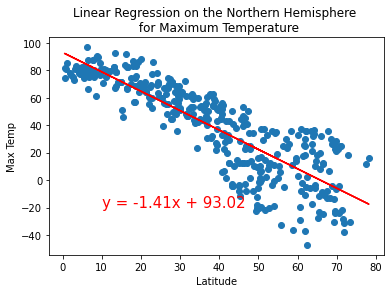

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,-20))

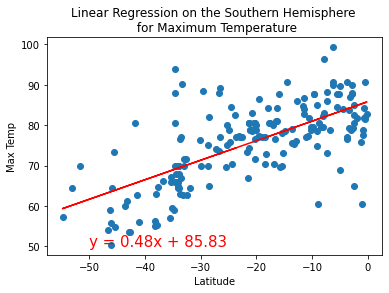

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,50))


In [24]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

LinregressResult(slope=-1.4131797455182336, intercept=93.02139120002083, rvalue=-0.8526425996997327, pvalue=1.3080719166514928e-108, stderr=0.04454164741627047)

In [25]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.48329749197669813, intercept=85.82643848897418, rvalue=0.6690201115511736, pvalue=2.285133020230504e-25, stderr=0.03969002850014239)

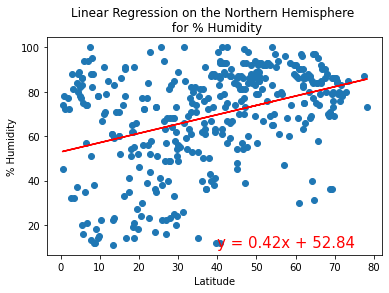

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

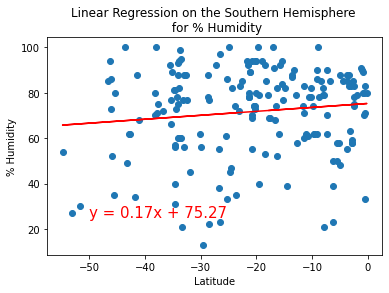

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))


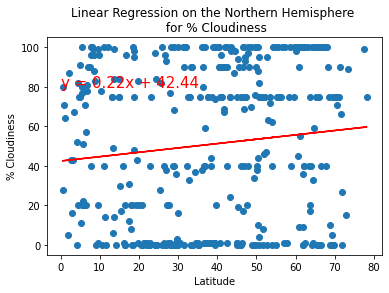

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,80))


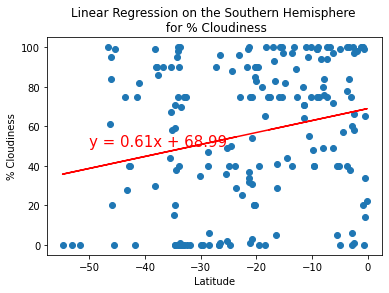

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,50)
                      )

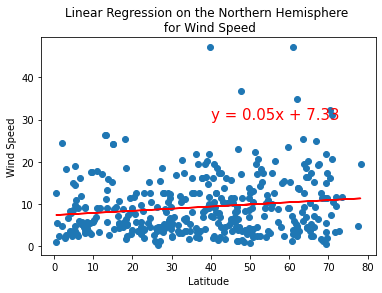

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))


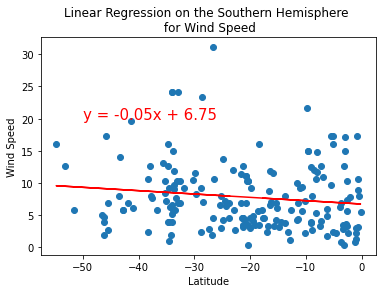

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))
